In [36]:
import pandas as pd
import random
import plotly.graph_objects as go
import plotly.express as px

(link to dataset)[https://dataverse.harvard.edu/dataset.xhtml?id=3047332]

In [2]:
tweets_df = pd.read_csv('./top-20-tweets-2017.csv')

In [3]:
tweets_df.shape

(52542, 10)

In [4]:
tweets_df.dtypes

author               object
content              object
country              object
date_time            object
id                  float64
language             object
latitude            float64
longitude           float64
number_of_likes       int64
number_of_shares      int64
dtype: object

In [5]:
print(
    tweets_df.date_time.min()
    , tweets_df.date_time.max()
)

01/01/2011 02:16 31/12/2016 23:59


In [6]:
tweets_df.sample(10)

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
21470,Twitter,@christinakucc https://t.co/bmmPhiGnnU,NaN,14/12/2016 01:28,8.088460e+17,und,NaN,NaN,34,17
48357,instagram,Instagrammers at #wwim14valencia in Spain were...,NaN,18/09/2016 16:44,7.775490e+17,en,NaN,NaN,717,132
12367,rihanna,“@TeamOfRihanna: Rihanna - Stade De France (Pa...,NaN,08/12/2012 13:41,2.774070e+17,en,NaN,NaN,827,1588
13275,YouTube,You know it’s a tough decision when a whale’s ...,NaN,21/11/2016 16:55,8.007450e+17,en,NaN,NaN,1944,304
164,katyperry,YES THIS ⤵️ https://t.co/2VTRjE18I9,NaN,10/10/2016 02:39,7.853090e+17,en,NaN,NaN,4255,985
2385,katyperry,YAY UK! A week early &amp; by popular demand y...,NaN,31/08/2013 23:11,3.739460e+17,en,NaN,NaN,2693,3422
30609,britneyspears,Amazing birthday surprise from my extended fam...,NaN,02/12/2013 23:05,4.076470e+17,en,NaN,NaN,5115,3421
21710,Twitter,Express yourself with more than just words. Ge...,NaN,28/09/2016 20:37,7.812310e+17,en,NaN,NaN,811,247
12237,rihanna,Mother Mary... I swear I wanna change #2013,NaN,09/01/2013 16:59,2.890540e+17,en,NaN,NaN,3508,9717
48414,instagram,Designer @TanyaTaylorNYC’s collections always ...,NaN,10/09/2016 17:30,7.746610e+17,en,NaN,NaN,760,137


In [7]:
tweets_df.author.unique()

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [9]:
sample_tweets = tweets_df.content.sample(1000).values
sample_scores = []
for tweet in sample_tweets:
    sample_scores.append(analyser.polarity_scores(tweet))
    
df = pd.DataFrame(data = {'tweet': sample_tweets, 'vader_score': sample_scores})
df['sample_compound_score'] = df.vader_score.apply(lambda x: x['compound'])
    

In [10]:
tweets_df['vader_score'] = tweets_df.content.apply(lambda x: analyser.polarity_scores(x))

In [11]:
tweets_df['compound_score'] = tweets_df.vader_score.apply(lambda x: x['compound'])
tweets_df['datetime'] = pd.to_datetime(tweets_df.date_time)
    

In [13]:
## is it really this easy to just get the happiness lexicon from the hedonometer
import requests


r = requests.get("http://hedonometer.org/api/v1/words/?format=json&wordlist__title=labMT-en-v2")

In [14]:
import json

json_data = json.loads(r.text)

In [15]:
# create hedonometer dict
hed_dict = {}

for obj in json_data['objects']:
    hed_dict[obj['word']] = obj

In [16]:
# random sample of hed_dict
keys = random.sample(list(hed_dict),10)

for k in keys:
    print(k, hed_dict[k])

udah {'happs': 4.82, 'rank': 7929, 'stdDev': 0.69, 'text': 'udah', 'word': 'udah', 'word_english': 'udah', 'wordlist': {'date': '2020-03-28', 'language': 'en', 'reference': 'https://arxiv.org/abs/2003.12614', 'referencetitle': "How the world's collective attention is being paid to a pandemic: COVID-19 related 1-gram time series for 24 languages on Twitter", 'title': 'labMT-en-v2'}}
suitcase {'happs': 5.74, 'rank': 3681, 'stdDev': 1.32, 'text': 'suitcase', 'word': 'suitcase', 'word_english': 'suitcase', 'wordlist': {'date': '2020-03-28', 'language': 'en', 'reference': 'https://arxiv.org/abs/2003.12614', 'referencetitle': "How the world's collective attention is being paid to a pandemic: COVID-19 related 1-gram time series for 24 languages on Twitter", 'title': 'labMT-en-v2'}}
bonnie {'happs': 5.3, 'rank': 5729, 'stdDev': 1.68, 'text': 'bonnie', 'word': 'bonnie', 'word_english': 'bonnie', 'wordlist': {'date': '2020-03-28', 'language': 'en', 'reference': 'https://arxiv.org/abs/2003.12614'

In [53]:
# clean words are words defined in hednometer lexicon
def get_word_ct(x, dict, tune_delta=None):
    res = []
    for wrd in str(x).split():
        if wrd.lower() in dict.keys():
            if tune_delta:
                if abs(dict[wrd.lower()]['happs'] - 5) > tune_delta:
                    res.append(wrd)
            else:
                res.append(wrd)
                    
    return len(res)
    
# get sum of clean word scores
def get_total_word_score(x, dict, tune_delta=None):
    res = []
    for wrd in str(x).split():
        if wrd.lower() in dict.keys():
            if tune_delta:
                if abs(dict[wrd.lower()]['happs'] - 5) > tune_delta:
                    res.append(dict[wrd.lower()]['happs'])
            else:
                res.append(dict[wrd.lower()]['happs'])
                    
    return sum(res)
    

tweets_df['hedonometer_word_count'] = tweets_df.content.apply(lambda x: get_word_ct(x, hed_dict,1))
tweets_df['hedonometer_total_score'] = tweets_df.content.apply(lambda x: get_total_word_score(x, hed_dict,1))
tweets_df['hedonometer_score'] = tweets_df.hedonometer_total_score/tweets_df.hedonometer_word_count

tweets_df.iloc[random.sample(range(100),1)]

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,vader_score,compound_score,datetime,hedonometer_word_count,hedonometer_total_score,hedonometer_score,compound_score_adj
61,katyperry,My name is 🐶 Nugget 🐶 and I approve this messa...,NaN,07/11/2016 17:38,7.956820e+17,en,NaN,NaN,20789,6894,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,2016-07-11 17:38:00,2,12.82,6.41,5.0


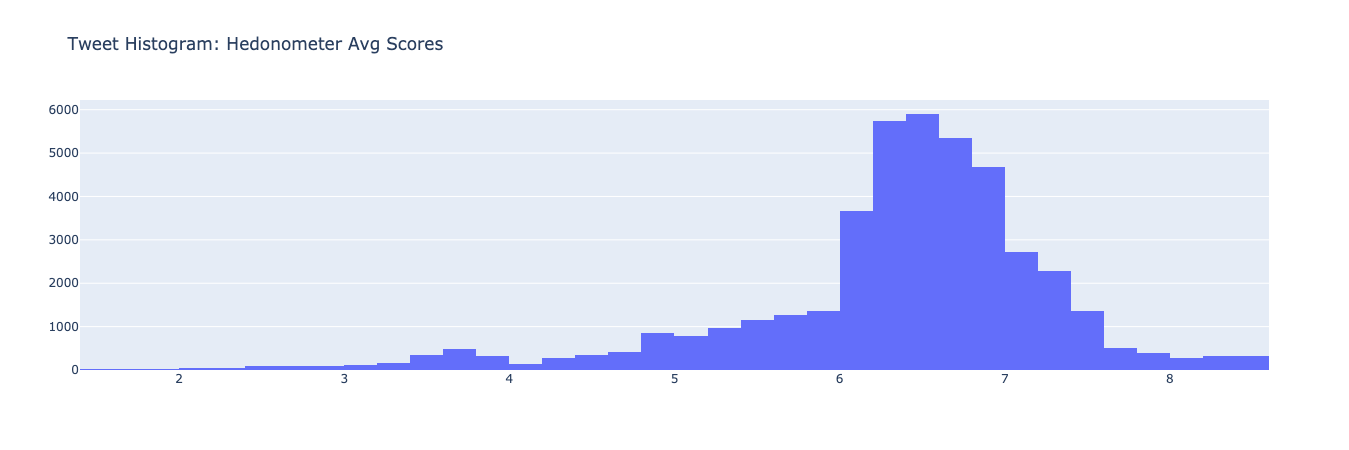

In [54]:
# histogram of hedonometer tweet scores without tuning 
fig = go.Figure({'data':[
    go.Histogram(x=tweets_df['hedonometer_score'], nbinsx=50)
]
                , 'layout': {"title": {"text": "Tweet Histogram: Hedonometer Avg Scores"}}
                }  
               )
fig.show()

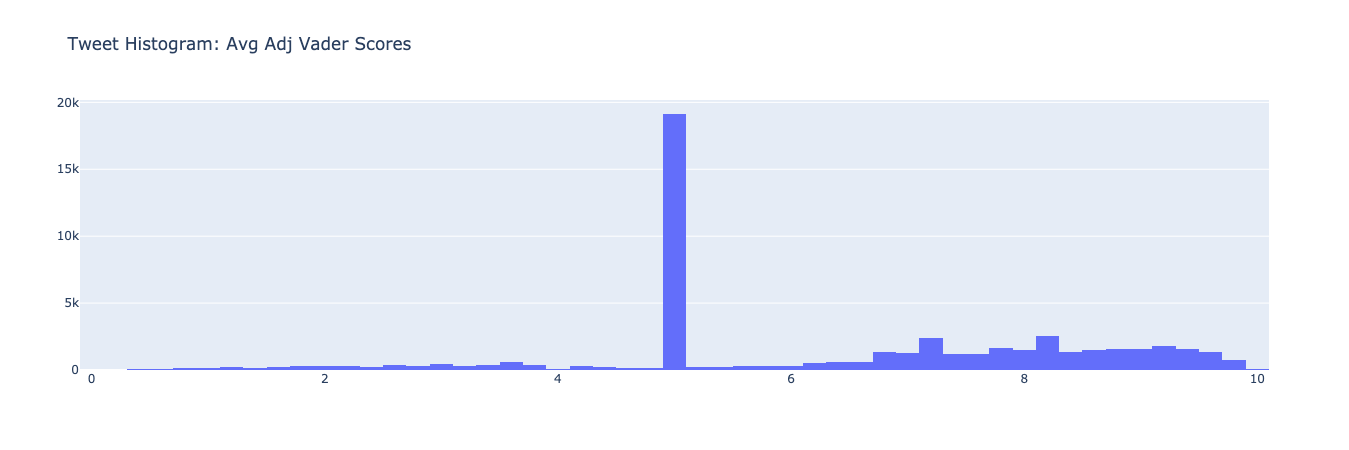

In [59]:
fig = go.Figure({'data':[
    go.Histogram(x=tweets_df['compound_score_adj'], nbinsx=50)
]
                , 'layout': {"title": {"text": "Tweet Histogram: Avg Adj Vader Scores"}}
                }  
               )
fig.show()

In [55]:
### happiness vs sentiment in 2015
hed_score_adj = 5
tweets_df['compound_score_adj'] = tweets_df.compound_score.apply(lambda x: x * hed_score_adj + hed_score_adj)

by_day_df = tweets_df[tweets_df.datetime.dt.year==2015].groupby(tweets_df.datetime.dt.date).agg(
    {
        'hedonometer_score': 'mean'
        , 'compound_score_adj': 'mean'
    }
)

by_day_df.head(20)

,hedonometer_score,compound_score_adj
datetime,,
2015-01-01,6.494567,6.719018
2015-01-02,6.427381,6.749382
2015-01-03,6.357218,6.959031
2015-01-04,6.462773,6.180159
2015-01-05,6.656369,6.590885
2015-01-06,6.308752,6.673330
2015-01-07,6.630154,6.715455
2015-01-08,6.735419,6.635379
2015-01-09,6.350026,6.376794


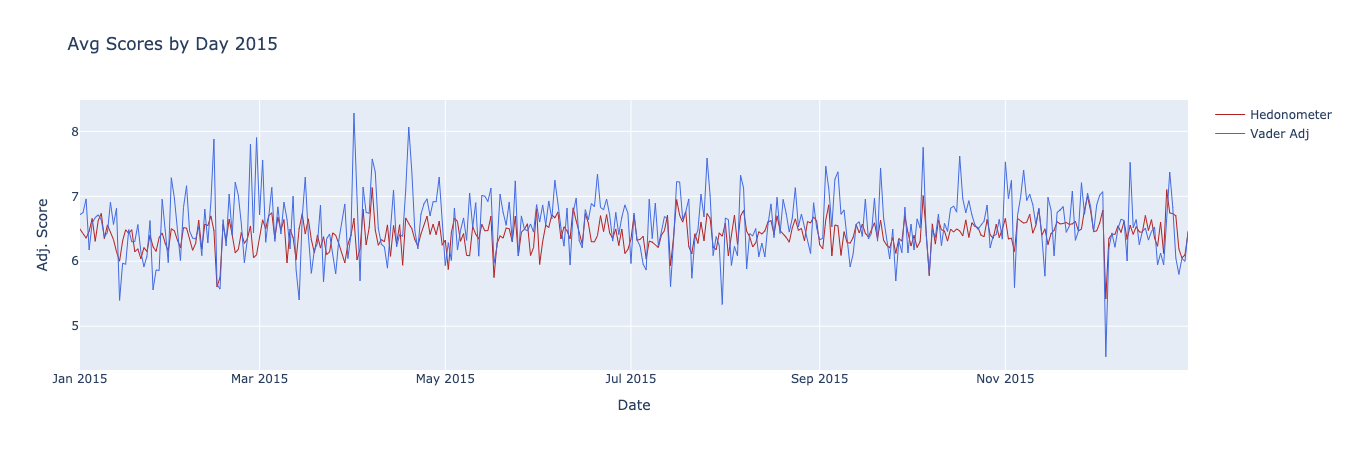

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=by_day_df.index.values
    , y=by_day_df.hedonometer_score
    , name='Hedonometer'
   , line=dict(color='firebrick', width=1))
)

fig.add_trace(go.Scatter(
    x=by_day_df.index.values
    , y=by_day_df.compound_score_adj
    , name='Vader Adj'
   , line=dict(color='royalblue', width=1))
)

# Edit the layout
fig.update_layout(title='Avg Scores by Day 2015',
                   xaxis_title='Date',
                   yaxis_title='Adj. Score')

fig.show()

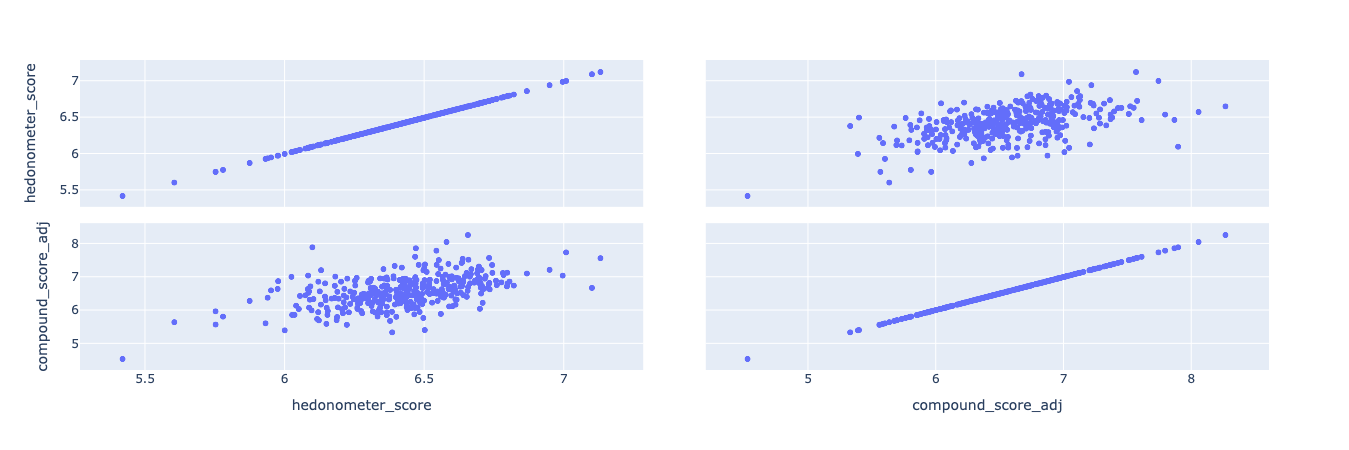

In [57]:
fig = px.scatter_matrix(by_day_df,
    dimensions=['hedonometer_score','compound_score_adj'])
fig.show()

In [58]:
import scipy.stats as stats

stats.pearsonr(by_day_df.compound_score_adj, by_day_df.hedonometer_score)

(0.5142342795057706, 4.997997971948181e-26)

[tutorial notes](http://docs.tweepy.org/en/latest/getting_started.html)

In [20]:
import os
import yaml
import tweepy

In [21]:
# api creds
creds = yaml.load(
    open(os.path.expanduser('~/.twitter/creds.yml')), 
    Loader=yaml.FullLoader)

In [22]:
# api auth
auth = tweepy.OAuthHandler(
    consumer_key=creds['api-key'], 
    consumer_secret=creds['api-secret']
)

auth.set_access_token(
    key=creds['access-token'], 
    secret=creds['access-token-secret']
)

api = tweepy.API(auth)

In [23]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

The Food and Drug Administration could grant emergency-use authorization to a Covid-19 vaccine as early as today, a… https://t.co/WVRQUSK750
The U.S. unemployment rate edged down slightly to 6.7% in November from 6.9% a month earlier. https://t.co/D0SpXMbUse
RT @BarstoolBrkfast: "We got in trouble for accidentally hotboxing the studio during last year's Christmas party." - @LargeBarstool

"Did w…
RT @zeynep: The idea that we're only facing medical issues is obviously not true, and it would really help matters if, at every level, ther…
RT @MattNegrin: WASHINGTON (AP) — America’s ruling party condemns democratic process for 34th straight day after opposition leader won pres…
Guy Fieri Raises $21.5 Million For Unemployed Restaurant Workers https://t.co/MeLZgL1Fgr #WhatDoYouThink? https://t.co/EhsX19qQt8
Brandon Bernard, a federal inmate involved in a double murder at Fort Hood in 1999 was executed, the second of six… https://t.co/ASAgA3i0g1
RT @BarstoolBrkfast: 🚨The 3rd Annual Barstool Br

In [24]:
user = api.get_user('ravedappeport')
user

User(_api=<tweepy.api.API object at 0x122a151d0>, _json={'id': 491393897, 'id_str': '491393897', 'name': 'Dave Rappeport', 'screen_name': 'RaveDappeport', 'location': '', 'profile_location': None, 'description': 'percolating and proliferating nonsense', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 55, 'listed_count': 0, 'created_at': 'Mon Feb 13 15:53:21 +0000 2012', 'favourites_count': 4, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 8, 'lang': None, 'status': {'created_at': 'Sun Feb 17 02:39:30 +0000 2013', 'id': 302970499300982784, 'id_str': '302970499300982784', 'text': 'Great speeches are a quality of great men #devries', 'truncated': False, 'entities': {'hashtags': [{'text': 'devries', 'indices': [42, 50]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://www.apple.com" rel="nofollow">iOS</a>', 'in_reply_to_status_id': None, 'in_rep